<a href="https://colab.research.google.com/github/BronteDallas/Projects/blob/main/Titanic_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survivors

In [ ]:
# This project uses data from the historia=cal titanic tragedy. The dataset 
# contains rows representing data for individuals that were aboard the titanic
# along with whether they survived or not.

# The aim of the project is to determine if survivors had any factors in common
# and hence was there any bias in who survived.

In [ ]:
# In this dataset variables are defined as shown in the table below:

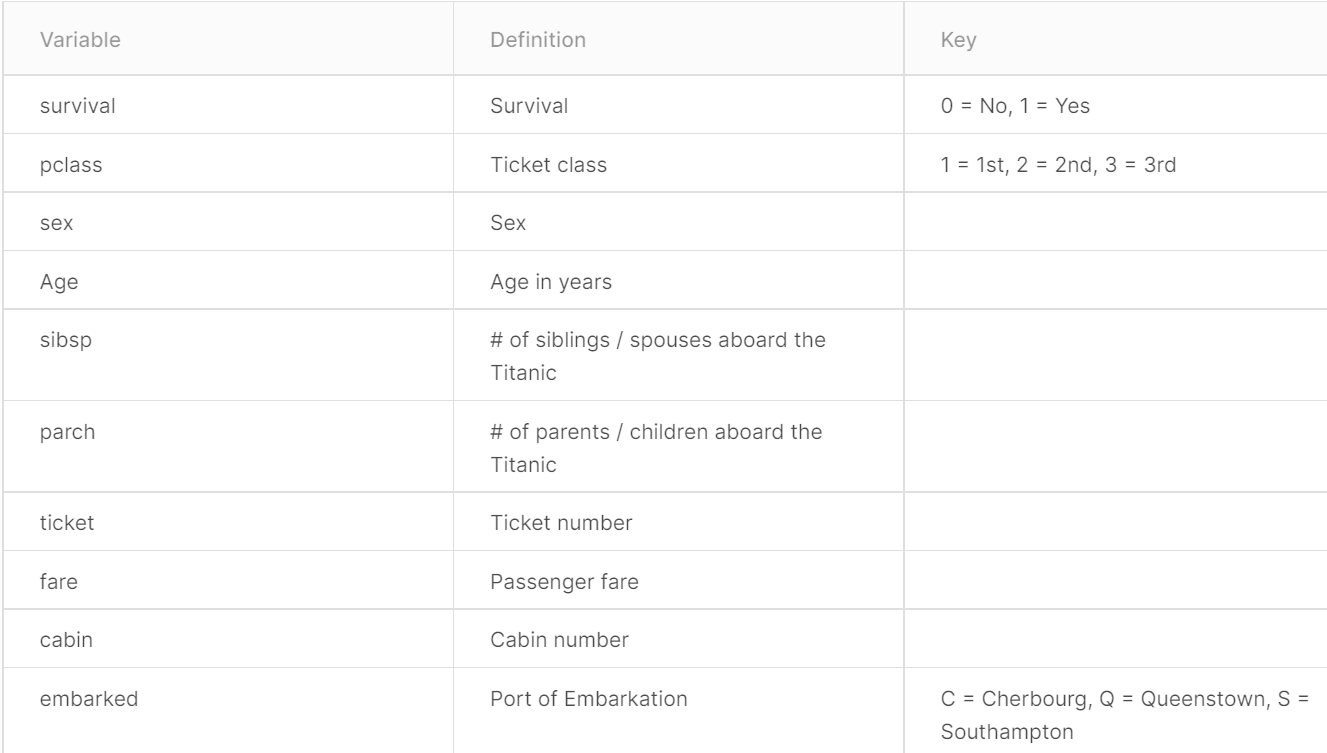

In [ ]:
# Show the top 5 rows of the dataset

import pandas as pd
datapath = 'titanic.csv'
data = pd.read_csv(datapath, header=0)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Describe the transposed data

data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


# Data Preparation

In [ ]:
# Convert 'PassengerId' colomn to index instead of removing the colomn
data = data.set_index("PassengerId")
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Check for null values

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
# This shows that the colomns 'Age', 'Cabin' and 'Embarked' have some empty
# entries as not all 891 rows comtain data.

In [ ]:
# Generate correlation table

correlations = data.corr() 
correlations 

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


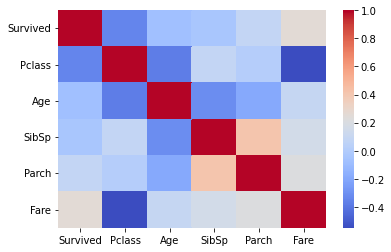

In [ ]:
# Generate correlation heatmap

import seaborn as sns # visualization library 
sns.heatmap(correlations, cmap='coolwarm') # coolwarm-> red and blue color style

In [ ]:
# I have decided to drop the 'Name', 'Ticket' and 'Cabin' (which has some empty
# entries) colomns as this data is not necessary for the analysis, mainly as it
# as these factors alone are very unlikely to have an impact on passenger
# survival as they are all linked to passenger wealth and hence the Pclass and
# Fare of the passengers which are colomns that we are keeping. Also, this data
# is not in a numeric format and we do not know the signifance of the Ticket or 
# Cabin reference codes so this information is on little use for this analysis.

In [ ]:
# Remove the colomns 'Name', 'Ticket' and 'Cabin' from the dataset

df = data.drop(['Name', 'Ticket', 'Cabin'], axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# Remove rows which have any missing data from the dataset

dff = df.dropna()
dff.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# Check that all rows with null/missing data have been removed form the dataset

dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [ ]:
# Define dfff to aid with analysis later on (male and female labels required)
# don't need the dropna() here but I don't want changes made on dfff to copy 
# over to dff
dfff = dff.dropna()

# Convert male and female into 0 and 1
sex_dict = {'male':0,'female':1}
dfff['Sex'] = dff['Sex'].apply(lambda x : sex_dict[x])

# Convert C, Q, S into 0,1,2
emb_dict = {'C':0, 'Q':1, 'S':2}
dfff['Embarked'] = dff['Embarked'].apply(lambda x : emb_dict[x])

dfff.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,2
2,1,1,1,38.0,1,0,71.2833,0
3,1,3,1,26.0,0,0,7.9250,2
4,1,1,1,35.0,1,0,53.1000,2
5,0,3,0,35.0,0,0,8.0500,2


In [ ]:
# Generate correlation heatmap

In [ ]:
correl = dfff.corr() 
correl

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.356462,0.536762,-0.082446,-0.015523,0.095265,0.266100,-0.181979
Pclass,-0.356462,1.000000,-0.150826,-0.365902,0.065187,0.023666,-0.552893,0.244145
Sex,0.536762,-0.150826,1.000000,-0.099037,0.106296,0.249543,0.182457,-0.109639
Age,-0.082446,-0.365902,-0.099037,1.000000,-0.307351,-0.187896,0.093143,-0.032565
SibSp,-0.015523,0.065187,0.106296,-0.307351,1.000000,0.383338,0.139860,0.033064
Parch,0.095265,0.023666,0.249543,-0.187896,0.383338,1.000000,0.206624,0.011803
Fare,0.266100,-0.552893,0.182457,0.093143,0.139860,0.206624,1.000000,-0.283510
Embarked,-0.181979,0.244145,-0.109639,-0.032565,0.033064,0.011803,-0.283510,1.000000


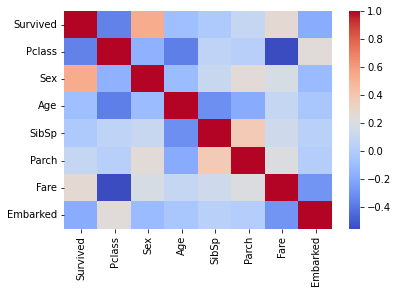

In [ ]:
import seaborn as sns # visualization library 
sns.heatmap(correl, cmap='coolwarm') # coolwarm-> red and blue color style

In [ ]:
# For this analysis the focus is to assess if there is any correlation between
# 'Survived' and all the other factors.

# The table and correlation heatmap above show that there is less than a 0.2 
# correlation between 'Survived' and the factors of 'Age', 'SibSp', 'Parch' and
# 'Embarked', hence in this analysis we will treat these correlations as
# neglible as they are very weak.

# The results show that there is a correlation of 'Survived' with 'Fare' is
# 0.27 and with 'Pclass' is 0.36. I would class these at weak correlations. The
# table and heatmap also show that there is a moderate correlation between the
# 'Fare' and 'Pclass' factors, which as a sanity check, does make logical sense
# as you would expect the passenger with higher class to have paid higher 'Fare'
# as these would likely stay in more luxurious cabins.

# The strongest correlation 'Survived' has is with 'Sex' with a value of 0.54.
# I would class this as a moderate correlation.

# Hence, in further analysis I will consider the correlations between 'Survided'
# and the 'Pclass' and 'Sex' factors.

In [ ]:
# So now my question is how to draw conclusions from this data regarding what
# these correlations are telling us. Did more high class or more lower class
# passengers survive? Did more men or women survive?

In [ ]:
dff.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
dfff.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,2
2,1,1,1,38.0,1,0,71.2833,0
3,1,3,1,26.0,0,0,7.9250,2
4,1,1,1,35.0,1,0,53.1000,2
5,0,3,0,35.0,0,0,8.0500,2


# Analysis

In [ ]:
dff['Sex'].value_counts()

male      453
female    259
Name: Sex, dtype: int64

In [ ]:
# Just to double check
dfff['Sex'].value_counts()

0    453
1    259
Name: Sex, dtype: int64

In [ ]:
male = dff['Sex'].value_counts().male
male

453

In [ ]:
female = dff['Sex'].value_counts().female
female

259

In [ ]:
dff['Survived'].value_counts()

0    424
1    288
Name: Survived, dtype: int64

In [ ]:
# Define ds to aid with analysis
# don't need the dropna() here but I don't want changes made on ds to copy 
# over to dff
ds = dff.dropna()

# Convert 0 and 1 into Died and Survived
surv_dict = {0:'died',1:'survived'}
ds['Survived'] = dff['Survived'].apply(lambda x : surv_dict[x])

ds.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,died,3,male,22.0,1,0,7.2500,S
2,survived,1,female,38.0,1,0,71.2833,C
3,survived,3,female,26.0,0,0,7.9250,S
4,survived,1,female,35.0,1,0,53.1000,S
5,died,3,male,35.0,0,0,8.0500,S


In [ ]:
# Just to check dff unaffected 
dff.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
male_died = ds['Survived'][(ds['Sex'] == 'male') & (ds['Survived'] == 'died')].count()
male_died

360

In [ ]:
female_died = ds['Survived'][(ds['Sex'] == 'female') & (ds['Survived'] == 'died')].count()
female_died

64

In [ ]:
male_surv = ds['Survived'][(ds['Sex'] == 'male') & (ds['Survived'] == 'survived')].count()
male_surv

93

In [ ]:
female_surv = ds['Survived'][(ds['Sex'] == 'female') & (ds['Survived'] == 'survived')].count()
female_surv

195

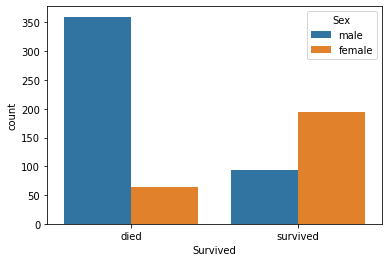

In [63]:
import seaborn as sns
sns.countplot(data=ds,x='Survived',hue='Sex')


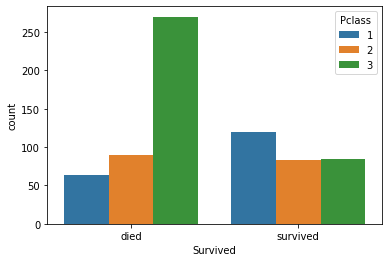

In [64]:
import seaborn as sns
sns.countplot(data=ds,x='Survived',hue='Pclass')